In [22]:
import yfinance as yf 
import pandas as pd 
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [23]:
# Function to fetch historical stock data
def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Close']

# Function to perform walk-forward optimization
def walk_forward_optimization(data, window_size, model):
    predictions = []
    
    # Iterate through the data, updating and re-optimizing the model
    for i in range(window_size, len(data)):
        train_data = data.iloc[i-window_size:i]
        test_data = data.iloc[i:i+1]

        # Extract features and target variable
        X_train, y_train = train_data.index.values.astype(int).reshape(-1, 1), train_data.values
        X_test, y_test = test_data.index.values.astype(int).reshape(-1, 1), test_data.values

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)[0]
        predictions.append(y_pred)

    return predictions

# Ticker symbol and date range
ticker_symbol = "USDMAD=X"
start_date = "2023-01-01"
end_date = "2024-01-01"

# Get historical stock data
stock_data = get_stock_data(ticker_symbol, start_date, end_date)

# Define the window size for walk-forward optimization
window_size = 30

# Initialize a linear regression model
model = LinearRegression()

# Perform walk-forward optimization
predictions = walk_forward_optimization(stock_data, window_size, model)

# Print the predicted stock prices
print("Predicted Stock Prices:")
print(predictions)



[*********************100%%**********************]  1 of 1 completed
Predicted Stock Prices:
[10.090836028258705, 10.180038332535203, 10.016409532624873, 10.128672167597562, 10.213820398440985, 10.066211858515064, 10.12409514236699, 10.01376067443247, 10.08515659307579, 9.992020975933839, 10.042734592560077, 10.106026416382571, 10.050185764022846, 10.114612657334732, 10.015878254593657, 10.08982507516973, 10.152228687116578, 10.095357528569254, 10.155282396851334, 10.12903237589586, 10.164544353520663, 10.176041013905456, 10.176355276077901, 10.206176062748428, 10.2057954045764, 10.222851457049503, 10.216216072355438, 10.222039481391871, 10.199006310046897, 10.210773634426658, 10.18511351947456, 10.169843685621835, 10.194654593139209, 10.191980579853361, 10.169208381383706, 10.189088538465523, 10.22746787639221, 10.189246496594865, 10.229247953387882, 10.185606241271028, 10.202968734546698, 10.23625386254066, 10.175504812084402, 10.206802825546372, 10.16879060281493, 10.173667417346602

In [24]:
predictions[-1]

9.953516667007609

In [25]:
test_data.values[-1]

9.88599967956543

Mean Squared Error (MSE): 0.04598499666457391


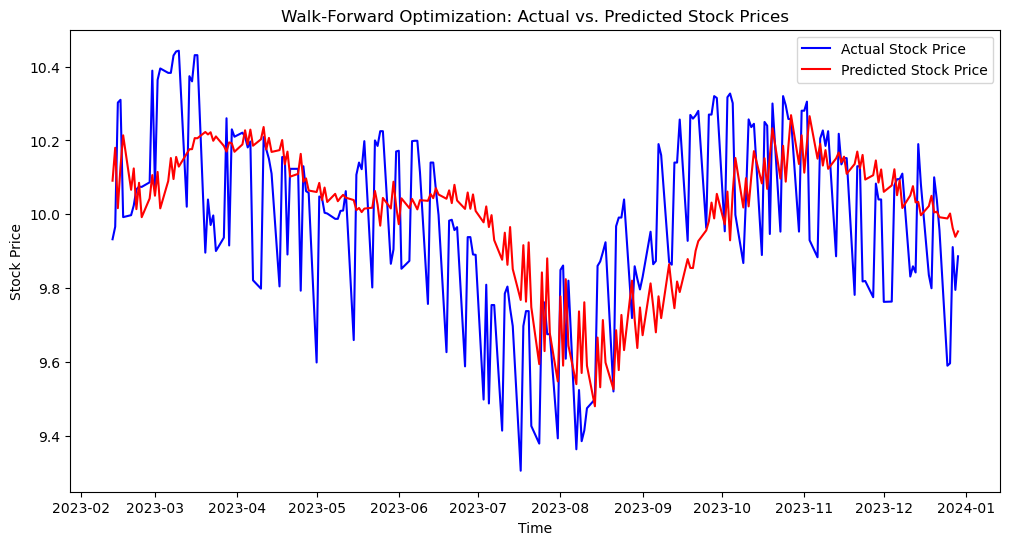

In [26]:
# Evaluate the performance using Mean Squared Error (MSE)
test_data = stock_data.iloc[window_size:]
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the actual vs. predicted stock prices
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data.values, label='Actual Stock Price', color='blue')
plt.plot(test_data.index, predictions, label='Predicted Stock Price', color='red')
plt.title('Walk-Forward Optimization: Actual vs. Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()